In [1]:
# get the code
import sys
import os
import re
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
sys.path.append('../code')

# import package functions
from script_utils_CNV import get_CNVconfig, show_output
from rollingCNV import interpolate, one_col_rolling, llh, rolling_data
from rollingCov import rolling_coverage
from combineCNV import filter_snp
from plot import plot_cov, plot_snp

######## need to find the chained assignment!!!
pd.set_option('mode.chained_assignment', None)

# HOME
home = '/Users/mahtin'
home = '/Users/martinscience'


# standard paths
static = os.path.join(home, "Dropbox/Icke/Work/static")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
PON_path = os.path.join(static, "PON/HAEv7_hg38_NovaSeq")


cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")
plot_path = os.path.join(cnvdata, "plot")
fig_path = os.path.join(cnvdata, "figures")

# config
+ use the get_CNVconfig util function to update the general configs with the appropriate paths

In [2]:
path_config = dict(
        mawk_path="../shell",
        cov_path=os.path.join(output_path, "pile2CNV"),   # path containing rawcov.gz files for this sample
        snp_path=os.path.join(output_path, "pile2CNV"),   # path containing snp files for this sample
        bed_file=os.path.join(static, "bed_files/SureSelect/hg38/SS_HAEv7_hg38_Padded.bed"),
        genome_split_path=os.path.join(static, "genome/gatk/hg38/split"),
        gc_split_path=os.path.join(static, "genome/gatk/hg38/split"),
        genmap_split_path=os.path.join(static, "annotation/genmap/hg38/split"),
        PON_path = PON_path,
    )
CNVconfig = get_CNVconfig(
    "../config/config_CNV.yaml", 
    local_config=path_config)

# load raw combined snp data and visualize

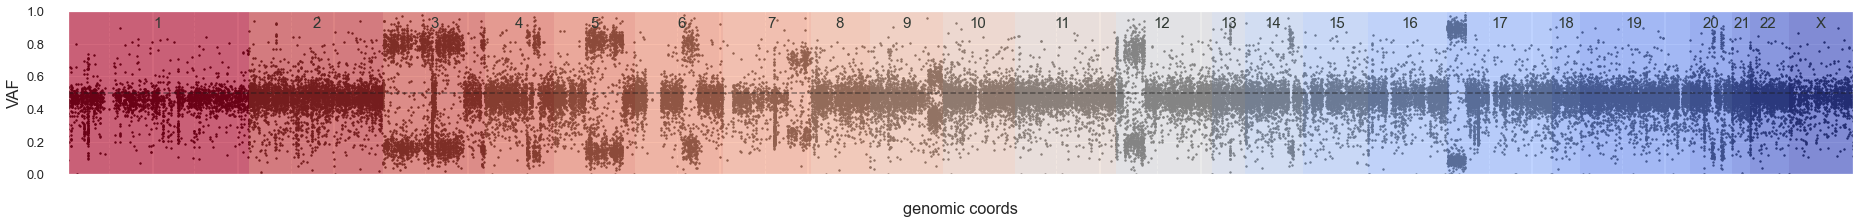

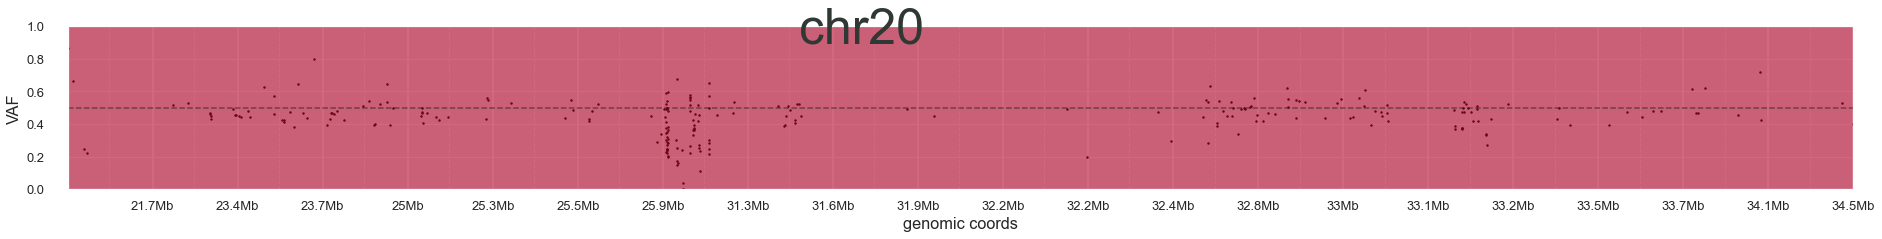

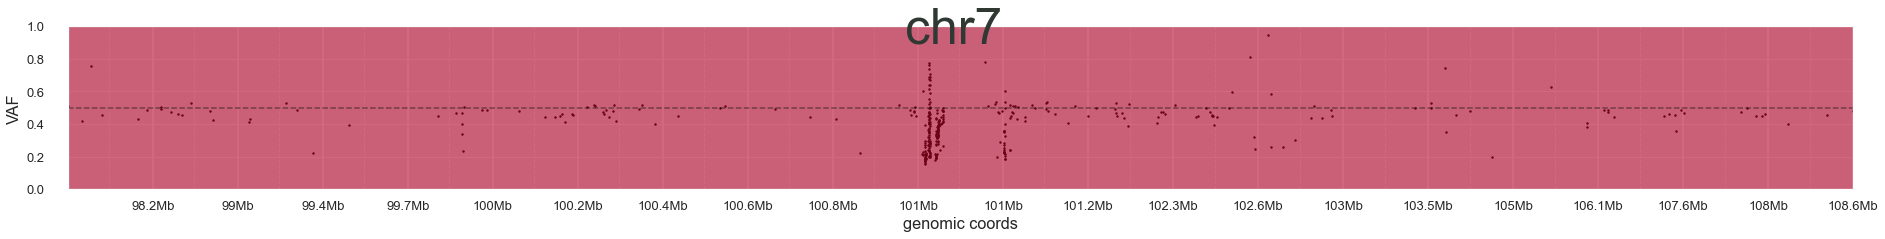

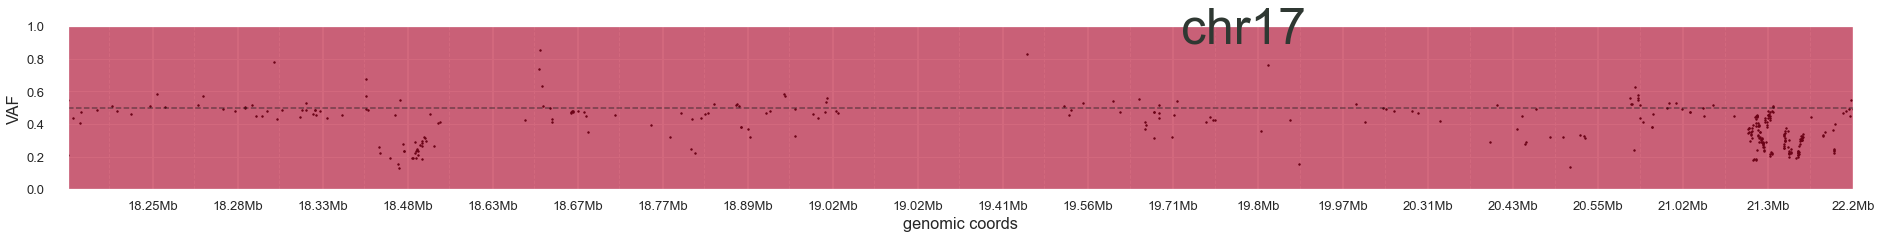

In [3]:
sample = "03_A-B"
snp_df = pd.read_csv(os.path.join(output_path, f"snp/{sample}.snp.gz"), sep="\t", compression="gzip")

fig_params = dict(
    figsize=(32,3),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(-0,1),
    label_size=13
)

vaf = dict(
        title='VAF',
        plot_type='scatter',  # ['line', 'scatter']
        data='VAF2',
        plot_args=dict(
            s=2,
            color='black',
            cmap='viridis',
            alpha=1
        )
    )
chroms = ['chr3', 'chr4', 'chr5', 'chr6','chr7', 'chr9', 'chr12', 'chr17']
r1 = 'chr17:3Mb-9Mb'

r20 = 'chr20:20.7Mb-34.5Mb'
r7 = 'chr7:95.8Mb-111Mb'
r17 = 'chr17:18.2Mb-25Mb'
fig, _, _, _ = plot_snp(snp_df, plots=[vaf], chroms="all", region='', **fig_params)
fig, _, df20, _ = plot_snp(snp_df, plots=[vaf], chroms="all", region=r20, **fig_params)
fig, _, df7, _ = plot_snp(snp_df, plots=[vaf], chroms="all", region=r7, **fig_params)
fig, _, df17, _ = plot_snp(snp_df, plots=[vaf], chroms="all", region=r17, **fig_params)
#fig, ax, df, chrom_df

# run the code

07:26:23 : Starting rolling SNP processing.
Merging SNP and coverage data.
Interpolating GCratio
Interpolating log2ratio1_mean
Interpolating covLLH1_sum
Interpolating log2ratio2_mean
Interpolating covLLH2_sum
Interpolating PONcov_mean
Centering VAFs.
Running fallSNP detection.
Removing fall SNPs.
Computing rolling window for SNPdensity of FullExonPos with window size 5
Reducing noise...
Filtering SNP data using PONVAF < 0.45 and map30_0 >= 0 and map50_0 >= 0.3 and map75_1 >= 0.3 and map100_2 >= 0.5 and fallSNP < 0.01 and SNPdensity < 0.02
07:27:02 : Finished SNP processing!


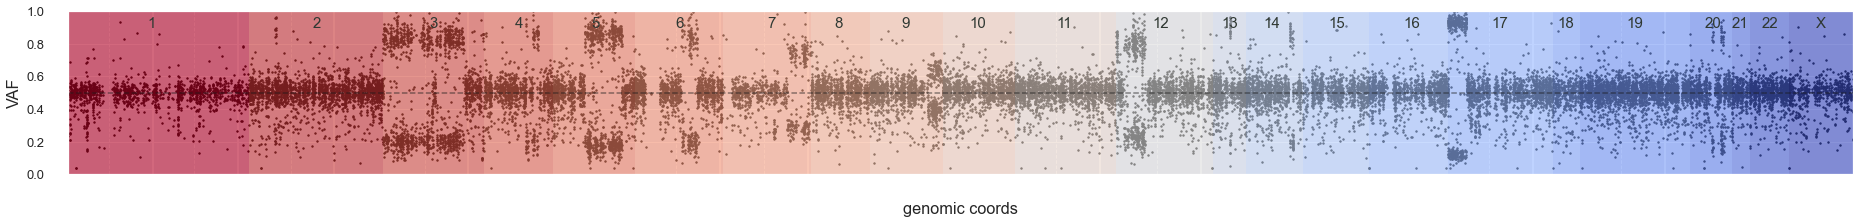

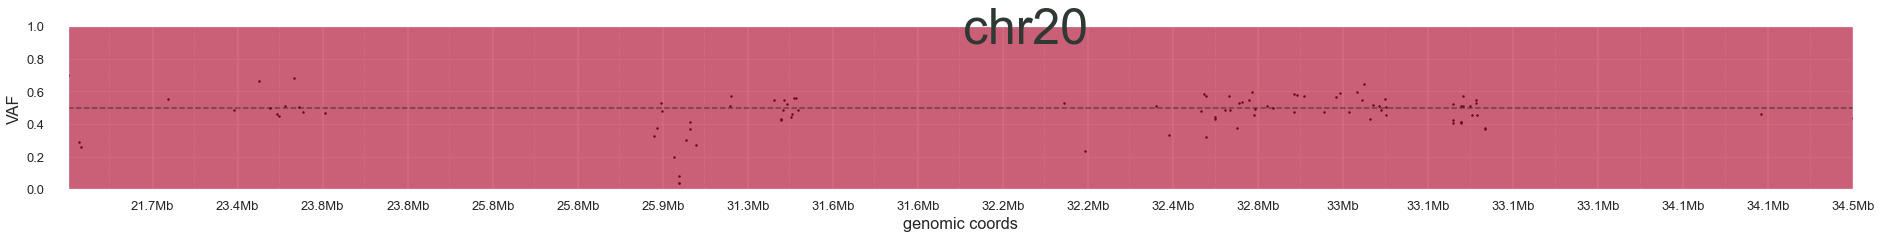

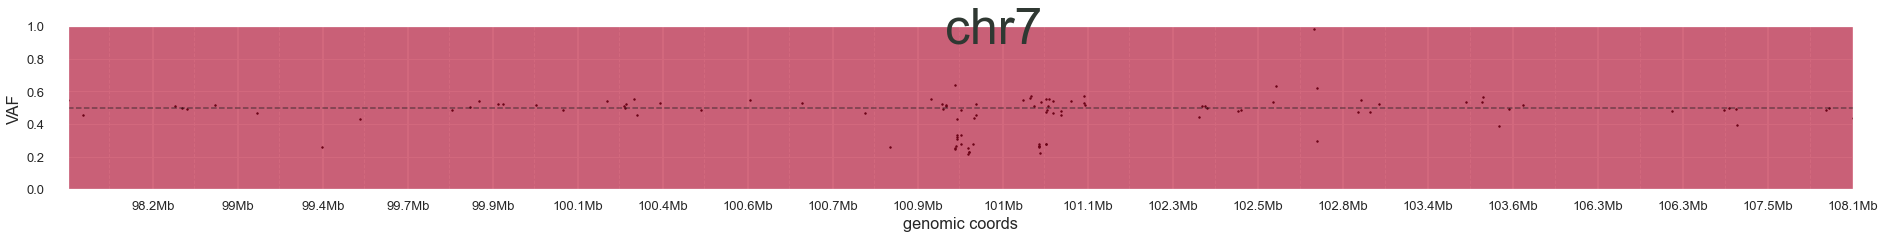

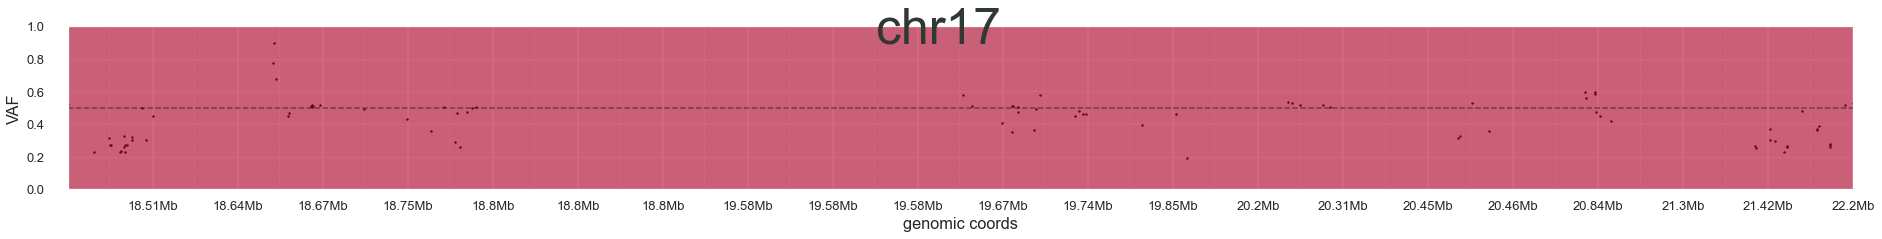

In [4]:
from rollingSNP import rolling_snp, remergeCNV

#### load coverage data
roll_cov_df = pd.read_csv(os.path.join(output_path, f"cov/{sample}.roll.cov.gz"), sep="\t", compression="gzip")

# run code 
rsnp_df = rolling_snp(snp_df, roll_cov_df, config=CNVconfig)

# visualize
fig, _, _, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region='', **fig_params)
fig, _, _, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region=r20, **fig_params)
fig, _, _, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region=r7, **fig_params)
fig, _, _, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region=r17, **fig_params)
# cnv_df = remergeCNV(rsnp_df, roll_cov_df)

In [9]:
cnv_df = remergeCNV(rsnp_df, roll_cov_df)
cnv_df

,Chr,Pos,ExonPos,FullExonPos,VAF1,VAF2,log2ratio1,log2ratio2
0,chr1,16740,2937,2937,NaN,NaN,-0.111274,0.235767
1,chr1,16750,2947,2947,NaN,NaN,-0.117714,0.229534
2,chr1,16760,2957,2957,NaN,NaN,-0.123994,0.223242
3,chr1,16900,3097,3097,NaN,NaN,-0.129533,0.217377
4,chr1,16910,3107,3107,NaN,NaN,-0.134822,0.210549
...,...,...,...,...,...,...,...,...
6010487,chrX,156027420,3327638,92574133,NaN,NaN,-0.784111,-0.485182
6010488,chrX,156027430,3327648,92574143,NaN,NaN,-0.799273,-0.501602
6010489,chrX,156027440,3327658,92574153,NaN,NaN,-0.816860,-0.523121
6010490,chrX,156027450,3327668,92574163,NaN,NaN,-0.838798,-0.548744


In [10]:
cnv_df.query("VAF1 == VAF1")

,Chr,Pos,ExonPos,FullExonPos,VAF1,VAF2,log2ratio1,log2ratio2
1881,chr1,1043223,52185,52185,0.256940,0.233060,NaN,NaN
3055,chr1,1185051,72189,72189,0.555952,0.515109,NaN,NaN
3344,chr1,1212042,77575,77575,0.416308,0.533224,NaN,NaN
3371,chr1,1213065,77866,77866,0.496601,0.494203,NaN,NaN
4101,chr1,1288032,92921,92921,0.541033,0.541565,NaN,NaN
...,...,...,...,...,...,...,...,...
6010296,chrX,156001308,3319393,92565888,0.561395,0.507648,NaN,NaN
6010337,chrX,156003433,3320286,92566781,0.467693,0.482290,NaN,NaN
6010370,chrX,156009834,3323422,92569917,0.304252,0.216547,NaN,NaN
6010394,chrX,156010159,3323747,92570242,0.426474,0.380197,NaN,NaN


### save the data

In [14]:
rsnp_df.to_csv(os.path.join(output_path, f"CNV/{sample}.cnv.snp.gz"), sep="\t", index=False, compression="gzip")
cnv_df.to_csv(os.path.join(output_path, f"CNV/{sample}.cnv.full.gz"), sep="\t", index=False, compression="gzip")

# combined functions

In [ ]:
path_config = dict(
        mawk_path="../shell",
        cov_path=os.path.join(output_path, "pile2CNV"),   # path containing rawcov.gz files for this sample
        snp_path=os.path.join(output_path, "pile2CNV"),   # path containing snp files for this sample
        bed_file=os.path.join(static, "bed_files/SureSelect/hg38/SS_HAEv7_hg38_Padded.bed"),
        genome_split_path=os.path.join(static, "genome/gatk/hg38/split"),
        gc_split_path=os.path.join(static, "genome/gatk/hg38/split"),
        genmap_split_path=os.path.join(static, "annotation/genmap/hg38/split"),
        PON_path = PON_path,
    )
CNVconfig = get_CNVconfig(
    "../config/config_CNV.yaml", 
    local_config=path_config)

# load data
sample = "03_A-B"
snp_df = pd.read_csv(os.path.join(output_path, f"snp/{sample}.snp.gz"), sep="\t", compression="gzip")
roll_cov_df = pd.read_csv(os.path.join(output_path, f"cov/{sample}.roll.cov.gz"), sep="\t", compression="gzip")

In [ ]:
def mergeCov2SNP(snp_df, cov_df):
    '''
    merge the columns to get all the coverage data from the rolling_coverage
    '''

    # get the columns
    snp_cols = list(snp_df.columns)
    base_cols = snp_cols[:4]
    cov_cols = [
        col
        for col in cov_df.columns
        if col.endswith("mean") or col.endswith("sum") or col == "GCratio"
    ]
    # reduce cols of cov_df
    cov_df = cov_df.loc[:, base_cols + cov_cols]
    # PONVAF and PONDepth have to be filled to zero
    for col in ["PONVAF", "PONDepth"]:
        snp_df.loc[:, col] = snp_df[col].fillna(0)

    snp_df = (
        snp_df.merge(cov_df, how="outer")
        .sort_values("FullExonPos")
        .reset_index(drop=True)
    )

    # interpolate the data
    for col in cov_cols:
        show_output(f"Interpolating {col}")
        snp_df = interpolate(snp_df, col, expand_limit=200)

    # reduce to VAF values
    snp_df = snp_df.query("PONVAF == PONVAF")
    return snp_df


def center_vaf(snp_df):
    '''
    adjusts VAFs to 0.5
    also includes the off-center VAF offVAF and
    absVAF
    '''
    
    df = snp_df.copy()
    cols = list(df.columns)
    
    for col in df.columns:
        if col.startswith("VAF"):
            cols = list(df.columns)
            insert_index = df.columns.get_loc(col) + 1
            df.loc[:, col] = df[col] + 0.5 - df[col].mean()
            # get additional features from VAFs
            # get offVAF as measure of straighing from center
            df.loc[:, f'off{col}'] = (df[col] - 0.5) * 2
            # get absVAF as absolute measure of straighing from center
            df.loc[:, f'abs{col}'] = np.abs(df[f'off{col}'])
            out_cols = cols[:insert_index] + [f'abs{col}',f'off{col}'] + cols[insert_index:]
            df = df.loc[:, out_cols]
    return df


# get the density computer for rolling
def make_get_density(window_size=20):
    '''
    helper for returning a density computer for given window_size
    '''
    
    def SNPdensity(data):
        return window_size / (data.max() - data.min())
    return SNPdensity


def get_fallSNP(snp_df, config={}):
    '''
    computes snpDensity and cumulative metrix snpFall (SNPdensity * PONVAF)
    '''
    df = snp_df.copy()
    
    c = config['rolling']['snp']
    
    window = c['data']['SNPdensity']
    # create the callback for rolling window computation
    get_SNPdensity = make_get_density(window)
    
    # make params for rolling_data function and roll custom function
    fallSNP_params = {"FullExonPos": {get_SNPdensity: window}}
    df = rolling_data(df, data_params=fallSNP_params, roll_config=c)
    # compute fallSNP from density
    df.loc[:, 'fallSNP'] = df['SNPdensity'] * df['PONVAF']
    # normalize
    df.loc[:, 'fallSNP'] = df['fallSNP'] / df['fallSNP'].max()
    return df


def filter_snp(snp_df, config={}):
    """
    takes the config and applies pre-filtering for rolling computation
    """

    df = snp_df.copy()
    c = config["filter"]["snp"]

    # ### build the query

    # minDepth = csnp['minDepth']
    # minVAF = csnp['minVAF']

    # PONVAF and PONDepth have to be filled to zero
    for col in ["PONVAF", "PONDepth"]:
        df.loc[:, col] = df[col].fillna(0)
    # pon query
    # minoffVAF = c["minoffVAF"]
    PON_query = f"PONVAF < {c['maxPONVAF']}"
    # Fall_query = f"(Fall2 < {maxFall} and offVAF2_sum > {minoffVAF})"
    Fall_query = f"fallSNP < {c['maxFallSNP']} and SNPdensity < {c['maxSNPdensity']}"
    # map query
    # extract map query from filter config
    # 'map30_0 > 0.1 and map50_0 > 0.1 and map75_1 > 0.1 and map100_2 > 0.1'
    map_query = " and ".join(
        [f"{m} >= {c[m]}" for m in c.keys() if m.startswith("map")]
    )

    snp_query = f"{PON_query} and {map_query} and {Fall_query}"
    show_output(f'Filtering SNP data using {snp_query.replace("@", "")}')
    df = df.query(snp_query)

    return df

def rolling_snp(snp_df, roll_cov_df, config={}):
    """
    performs data preprocessing for CNV analysis
    """

    df = snp_df.copy()
    # get config

    show_output("Starting rolling SNP processing.", time=True)

    show_output("Merging SNP and coverage data.")
    df = mergeCov2SNP(df, roll_cov_df)

    show_output("Centering VAFs.")
    df = center_vaf(df)

    show_output("Running fallSNP detection.")
    # compute fallSNP
    show_output("Removing fall SNPs.")
    df = get_fallSNP(df, config=config)
    # filter snp

    show_output("Reducing noise...")
    df = filter_snp(df, config=config)
    show_output("Finished SNP processing!", time=True, color="success")
    return df

In [ ]:
rsnp_df = rolling_snp(snp_df, roll_cov_df, config=CNVconfig)
fig, _, _, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region='', **fig_params)
fig, _, _, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region=r20, **fig_params)
fig, _, df7, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region=r7, **fig_params)
fig, _, df2, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region=r17, **fig_params)

# Step by step

## SNP data processing
+ merge with coverage data for incorporation of coverage data sets (some data needs interpolation)
+ filtering data for SNPdensity and excessive PONVAF
+  creating ASCAT output

## merge coverage data into SNP
+ reduce to important columns

In [ ]:
roll_cov_df = pd.read_csv(os.path.join(output_path, f"cov/{sample}.roll.cov.gz"), sep="\t", compression="gzip")
roll_cov_df.columns

In [ ]:
def mergeCov2SNP(snp_df, cov_df):
    '''
    merge the columns to get all the coverage data from the rolling_coverage
    '''

    # get the columns
    snp_cols = list(snp_df.columns)
    base_cols = snp_cols[:4]
    cov_cols = [
        col
        for col in cov_df.columns
        if col.endswith("mean") or col.endswith("sum") or col == "GCratio"
    ]
    # reduce cols of cov_df
    cov_df = cov_df.loc[:, base_cols + cov_cols]
    # PONVAF and PONDepth have to be filled to zero
    for col in ["PONVAF", "PONDepth"]:
        snp_df.loc[:, col] = snp_df[col].fillna(0)

    snp_df = (
        snp_df.merge(cov_df, how="outer")
        .sort_values("FullExonPos")
        .reset_index(drop=True)
    )

    # interpolate the data
    for col in cov_cols:
        show_output(f"Interpolating {col}")
        snp_df = interpolate(snp_df, col, expand_limit=200)

    # reduce to VAF values
    snp_df = snp_df.query("PONVAF == PONVAF")
    return snp_df



In [ ]:
snp_df = mergeCov2SNP(snp_df, roll_cov_df)
snp_df.columns

## heteroSNP rolling window
+ #### first, VAF is centered
+ #### next, fallSNP have to be removed
+ #### next, important local features have to be extracted:
    * SNPdensity: measure of genomic spread of SNPs in order to find falling SNPs
    * absVAF: absolute dist measure from meanVAF
    * snpLLH: log-likelihood to belong the center gaussian

+ #### next, these local features have to be computed with a rolling window to convert local to regional data

In [ ]:
def center_vaf(snp_df):
    '''
    adjusts VAFs to 0.5
    also includes the off-center VAF offVAF and
    absVAF
    '''
    
    df = snp_df.copy()
    cols = list(df.columns)
    
    for col in df.columns:
        if col.startswith("VAF"):
            cols = list(df.columns)
            insert_index = df.columns.get_loc(col) + 1
            df.loc[:, col] = df[col] + 0.5 - df[col].mean()
            # get additional features from VAFs
            # get offVAF as measure of straighing from center
            df.loc[:, f'off{col}'] = (df[col] - 0.5) * 2
            # get absVAF as absolute measure of straighing from center
            df.loc[:, f'abs{col}'] = np.abs(df[f'off{col}'])
            out_cols = cols[:insert_index] + [f'abs{col}',f'off{col}'] + cols[insert_index:]
            df = df.loc[:, out_cols]
    return df

## center VAF

In [ ]:
snp_df['VAF1'].mean()
snp_df['VAF2'].mean()
csnp_df = center_vaf(snp_df)
csnp_df['VAF1'].mean()
csnp_df['VAF2'].mean()

## include metrices to exclude fallSNP
+ compute genomic snp-density ( (window / stretch))
+ (maybe combine with rolling offVAFsum?)
+ remove the negative offVAF in that range

In [ ]:
# get the density computer for rolling
def make_get_density(window_size=20):
    '''
    helper for returning a density computer for given window_size
    '''
    
    def SNPdensity(data):
        return window_size / (data.max() - data.min())
    return SNPdensity


def get_fallSNP(snp_df, config={}):
    '''
    computes snpDensity and cumulative metrix snpFall (SNPdensity * PONVAF)
    '''
    df = snp_df.copy()
    
    c = config['rolling']['snp']
    
    window = c['data']['SNPdensity']
    # create the callback for rolling window computation
    get_SNPdensity = make_get_density(window)
    
    # make params for rolling_data function and roll custom function
    fallSNP_params = {"FullExonPos": {get_SNPdensity: window}}
    df = rolling_data(df, data_params=fallSNP_params, roll_config=c)
    # compute fallSNP from density
    df.loc[:, 'fallSNP'] = df['SNPdensity'] * df['PONVAF']
    # normalize
    df.loc[:, 'fallSNP'] = df['fallSNP'] / df['fallSNP'].max()
    return df

In [ ]:
exp_df = get_fallSNP(csnp_df, config=CNVconfig)

In [ ]:
dense = dict(
        title='dense',
        plot_type='line',  # ['line', 'scatter']
        data='SNPdensity',
        plot_args=dict(
            color='red',
            alpha=1
        )
    )

fall2 = dict(
        title='fall',
        plot_type='line',  # ['line', 'scatter']
        data='fallSNP',
        plot_args=dict(
            color='green',
            alpha=1
        )
    )

ponvaf = dict(
        title='PONVAF',
        plot_type='line',  # ['line', 'scatter']
        data='PONVAF',
        plot_args=dict(
            color='yellow',
            alpha=1
        )
    )

fig, _, _, _ = plot_snp(exp_df, plots=[vaf, fall2, dense], chroms="all", region='', **fig_params)
fig, _, df20, _ = plot_snp(exp_df, plots=[vaf, fall2, dense], chroms="all", region=r20, **fig_params)
fig, _, df7, _ = plot_snp(exp_df, plots=[vaf, fall2, dense], chroms="all", region=r7, **fig_params)
fig, _, df17, _ = plot_snp(exp_df, plots=[vaf, fall2, dense], chroms="all", region=r17, **fig_params)
fig, _, df17, _ = plot_snp(exp_df, plots=[vaf, fall2, dense], chroms="all", region="chr20", **fig_params)
#fig, ax, df, chrom_df

## filter snp data

In [ ]:
def filter_snp(snp_df, config={}):
    """
    takes the config and applies pre-filtering for rolling computation
    """

    df = snp_df.copy()
    c = config["filter"]["snp"]

    # ### build the query

    # minDepth = csnp['minDepth']
    # minVAF = csnp['minVAF']

    # PONVAF and PONDepth have to be filled to zero
    for col in ["PONVAF", "PONDepth"]:
        df.loc[:, col] = df[col].fillna(0)
    # pon query
    # minoffVAF = c["minoffVAF"]
    PON_query = f"PONVAF < {c['maxPONVAF']}"
    # Fall_query = f"(Fall2 < {maxFall} and offVAF2_sum > {minoffVAF})"
    Fall_query = f"fallSNP < {c['maxFallSNP']} and SNPdensity < {c['maxSNPdensity']}"
    # map query
    # extract map query from filter config
    # 'map30_0 > 0.1 and map50_0 > 0.1 and map75_1 > 0.1 and map100_2 > 0.1'
    map_query = " and ".join(
        [f"{m} >= {c[m]}" for m in c.keys() if m.startswith("map")]
    )

    snp_query = f"{PON_query} and {map_query} and {Fall_query}"
    show_output(f'Filtering SNP data using {snp_query.replace("@", "")}')
    df = df.query(snp_query)

    return df

In [ ]:
CNVconfig = get_CNVconfig(
    "../config/config_CNV.yaml", 
    local_config=path_config)
filter_snp_df = filter_snp(exp_df, config=CNVconfig)
fig, _, _, _ = plot_snp(filter_snp_df.query('SNPdensity<0.01'), plots=[vaf], chroms="all", region='', **fig_params)
fig, _, _, _ = plot_snp(filter_snp_df, plots=[vaf], chroms="all", region=r20, **fig_params)
fig, _, df7, _ = plot_snp(filter_snp_df, plots=[vaf], chroms="all", region=r7, **fig_params)
fig, _, df2, _ = plot_snp(filter_snp_df, plots=[vaf], chroms="all", region=r17, **fig_params)
len(filter_snp_df.index)

## master function

In [ ]:
def rolling_snp(snp_df, roll_cov_df, config={}):
    """
    performs data preprocessing for CNV analysis
    """

    df = snp_df.copy()
    # get config

    show_output("Starting rolling SNP processing.", time=True)

    show_output("Merging SNP and coverage data.")
    df = mergeCov2SNP(df, roll_cov_df)

    show_output("Centering VAFs.")
    df = center_vaf(df)

    show_output("Running fallSNP detection.")
    # compute fallSNP
    show_output("Removing fall SNPs.")
    df = get_fallSNP(df, config=config)
    # filter snp

    show_output("Reducing noise...")
    df = filter_snp(df, config=config)
    show_output("Finished SNP processing!", time=True, color="success")
    return df

In [ ]:
CNVconfig = get_CNVconfig(
    "../config/config_CNV.yaml", 
    local_config=path_config)
rsnp_df = rolling_snp(snp_df, roll_cov_df, config=CNVconfig)
fig, _, _, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region='', **fig_params)
fig, _, _, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region=r20, **fig_params)
fig, _, df7, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region=r7, **fig_params)
fig, _, df2, _ = plot_snp(rsnp_df, plots=[vaf], chroms="all", region=r17, **fig_params)

## merge  

In [15]:
def remergeCNV(snp_df, cov_df):
    """
    remerge the rolling data for coverage and snp for an integrated data file
    containing many nas
    """

    # select the right cols

    base_cols = ["Chr", "Pos", "ExonPos", "FullExonPos"]
    snp_cols = [col for col in snp_df.columns if col.startswith("VAF")]
    log2_pat = re.compile(r"log2ratio[0-9]+(_mean)?$")
    cov_cols = [col for col in cov_df.columns if re.match(log2_pat, col)]
    snp_df = snp_df.loc[:, base_cols + snp_cols]
    cov_df = cov_df.loc[:, base_cols + cov_cols]
    cnv_df = (
        snp_df.merge(cov_df, how="outer")
        .sort_values("FullExonPos")
        .reset_index(drop=True)
    )
    return cnv_df

In [13]:
cnv_df = remergeCNV(rsnp_df, roll_cov_df)
cnv_df

Index(['Chr', 'Pos', 'ExonPos', 'FullExonPos', 'VAF1', 'VAF2', 'log2ratio1',
       'log2ratio1_mean', 'log2ratio2', 'log2ratio2_mean'],
      dtype='object')


,Chr,Pos,ExonPos,FullExonPos,VAF1,VAF2,log2ratio1,log2ratio1_mean,log2ratio2,log2ratio2_mean
0,chr1,16740,2937,2937,NaN,NaN,0.862645,-0.111274,1.076845,0.235767
1,chr1,16750,2947,2947,NaN,NaN,0.783396,-0.117714,1.115650,0.229534
2,chr1,16760,2957,2957,NaN,NaN,0.676190,-0.123994,1.086940,0.223242
3,chr1,16900,3097,3097,NaN,NaN,0.605348,-0.129533,1.304226,0.217377
4,chr1,16910,3107,3107,NaN,NaN,0.666458,-0.134822,1.376938,0.210549
...,...,...,...,...,...,...,...,...,...,...
6010487,chrX,156027420,3327638,92574133,NaN,NaN,-3.116310,-0.784111,-3.319740,-0.485182
6010488,chrX,156027430,3327648,92574143,NaN,NaN,-3.543102,-0.799273,-3.714612,-0.501602
6010489,chrX,156027440,3327658,92574153,NaN,NaN,-4.004914,-0.816860,-4.890109,-0.523121
6010490,chrX,156027450,3327668,92574163,NaN,NaN,-5.731827,-0.838798,-6.421957,-0.548744


# ######

### LEGACY

In [ ]:
def remove_fallSNP(snp_df, mean=0.5, std=0.2, params={}):
    '''
    removes the falling SNP probably caused by mismapping
    '''
    
    window = params['offVAFwindow']
    cutoff = params['maxFallSNP']
    
    # get the density computer for rolling
    get_SNPdensity = make_get_density(window)
    # cycle through chroms
    chrom_dfs = []
    for chrom in snp_df['Chr'].unique():
        df = snp_df.query('Chr == @chrom')
  
        # get the snp
        df = one_col_rolling(df, df.query('VAF < 0.95'), 'ExonPos', get_SNPdensity, window_size=window, diff_exp=4)
        df.loc[:, 'SNPdensity'] = df['SNPdensity'] / df['SNPdensity'].mean()
    
        # get the offVAFsum
        df = one_col_rolling(df, df.query('VAF < 0.95'), 'offVAF', 'sum', window_size=window, normalize=True, diff_exp=4)
    
        # combine both metrices
        df.loc[:, 'fallSNP'] = df['SNPdensity'] * df['offVAFsum']
        # now remove the ones below average VAFstd
        df = df.query('VAF > @mean - @std / 2 or fallSNP > @cutoff')
        chrom_dfs.append(df)
        
    return pd.concat(chrom_dfs).sort_values('FullExonPos').reset_index(drop=True)

### expand the LLH

In [ ]:
def compute_snp_llh(df, mean=0.5, sigma=0.2):
    '''
    computes the local log-likelihood of belonging to the center gaussian
    '''
        
    show_output(f"Computing log-likelihood of VAF belonging to center gaussian [mean:{round(mean, 3)}, sigma:{round(sigma,3)}]")
    df.loc[:, 'snpLLH'] = llh(df['VAF'], mean, sigma)
    
    # for homoSNPs reduce the VAFs to the ones above mean
    upper_vafs = df.query('@mean < VAF')['VAF']
    # then compute the hsnpLLH

    show_output(f"Computing log-likelihood of VAF belonging to purity100  [mean:1, sigma:{round(sigma,3)}]")
    # these are called hsnp
    # upper_vafs only contains half the snps, the remaining have to be interpolated
    df.loc[:, 'hsnpLLH'] = llh(upper_vafs, 1, sigma)
    df = interpolate(df, 'hsnpLLH', expand_limit=50)
    return df
    

def expand_SNPdata(snp_df, config):
    '''
    retrieve a few data columns locally to use rolling windows on
    this needs to be done chromosome-wise in order to avoid gap effects
    VAF limits are also applied here
    '''
        
    # split the params dict for easier access
    params = config['snp']
    filter_params = params['filter']
    # data_params = params['data']
    
    # reduce the snp_df using lower config limit
    # upper limit has to be set later as we still need the homoSNP llh
    VAFmin, VAFmax = filter_params['VAF']
    snp_df = snp_df.query('@VAFmin < VAF')
    
    
    # get std and mean of VAF
    minVAF, maxVAF = params['LLH']['center_range']
    # get the sigma and mean of the center band VAF (extracted as pd.Series center_vafs)
    center_vafs = snp_df.query('@minVAF < VAF < @maxVAF')['VAF']
    # get width of gaussian from std * sigma_factor
    VAFstd = center_vafs.std()
    VAFmean = center_vafs.mean()
    
    
    # get additional features from VAFs
    snp_df.loc[:, 'offVAF'] = (snp_df['VAF'] - VAFmean) * 2
    # absolute values for cluster 
    snp_df.loc[:,'absVAF'] = np.abs(snp_df['offVAF'])    
    
    ########## remove fallSNP ########
    fs_params = params['fallSNP']
    if fs_params['run']:
        show_output('Removing falling SNPs')
        snp_df = remove_fallSNP(snp_df, mean=VAFmean, std=VAFstd, params=fs_params)
     
    ######## LLH  #####################
    # get the snpLLH and hsnpLLH
    # get config params
    sigma = VAFstd * params['LLH']['sigma_factor']
    # hsnpLLH is computed in order to rescue high absVAF that would have been filtered out
    # lower VAF is already removed because density of VAF ~0 is highly irregular and would confound 
    snp_df = compute_snp_llh(snp_df, mean=VAFmean, sigma=sigma)

    return snp_df.query('VAF < @VAFmax').reset_index(drop=True)

In [ ]:
def rolling_SNP(snp_df, config):
    '''
    cycle through the chroms and perform rolling window computations of snp data set in config
    '''

    # split the params dict for easier access
    params = config['snp']
    filter_params = params['filter']
    data_params = params['rolling_data']
    debug = config['debug']
        
    minDepth = filter_params['minDepth']
    filter_df = snp_df.query('Depth >= @minDepth')
    
    rolling_df = rolling_data(snp_df, filter_df, expand=params['expand'], ddof=config['ddof'], debug=debug, data_params=data_params)
    
    return rolling_df